# Analiza podatkov

Avtorica: Neža Zupančič

Vsi podatki, ki so bili uporabljeni v projektni nalogi, so bili zbrani iz spletne strani: [Basketball reference](https://www.basketball-reference.com/)
Gre za statistične podatke igralcev lige NBA za zadnjih 25 let. Ta statistika predstavlja sezonska povprečja. 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

tabela_podatkov = pd.read_csv("pridobivanje_podatkov/podatki.csv")

## 1. Tabela podatkov

Za začetek si oglejmo tabelo podatkov.


In [63]:
tabela_podatkov

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Year
0,1,Shaquille O'Neal,27,LAL,C,79,79,40.0,12.1,21.1,...,9.4,13.6,3.8,0.5,3.0,2.8,3.2,29.7,"MVP-1,DPOY-2,AS,NBA1,DEF2",2000
1,2,Allen Iverson,24,PHI,SG,70,70,40.8,10.4,24.8,...,2.8,3.8,4.7,2.1,0.1,3.3,2.3,28.4,"MVP-7,AS,NBA2",2000
2,3,Grant Hill,27,DET,SF,74,74,37.5,9.4,19.2,...,5.3,6.6,5.2,1.4,0.6,3.2,2.6,25.8,"MVP-8,AS,NBA2",2000
3,4,Vince Carter,23,TOR,SF,82,82,38.1,9.6,20.7,...,4.0,5.8,3.9,1.3,1.1,2.2,3.2,25.7,"MVP-10,AS,NBA3",2000
4,5,Karl Malone,36,UTA,PF,82,82,35.9,9.2,18.0,...,7.4,9.5,3.7,1.0,0.9,2.8,2.8,25.5,"MVP-4,AS,NBA2",2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15153,568,Danny Green,36,PHI,SG,2,0,9.0,0.0,1.0,...,1.0,1.0,0.5,0.5,0.0,0.0,0.5,0.0,NaN,2024
15154,569,Ron Harper Jr.,23,TOR,PF,1,0,4.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,NaN,2024
15155,570,Justin Jackson,28,MIN,SF,2,0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024
15156,571,Dmytro Skapintsev,25,NYK,C,2,0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024


## 2. Povprečno število točk igralcev

### 2.1. Top 5

Najprej me zanima povprečje doseženih točk najboljših pet igralcev v vsakih sezoni.

In [64]:
top5_igralcev = (
    tabela_podatkov.groupby("Year", group_keys=False)
    .apply(lambda x: x.nlargest(5, "PTS"))
)

print(top5_igralcev[["Year", "Player", "PTS"]])

       Year                   Player   PTS
0      2000         Shaquille O'Neal  29.7
1      2000            Allen Iverson  28.4
2      2000               Grant Hill  25.8
3      2000             Vince Carter  25.7
4      2000              Karl Malone  25.5
...     ...                      ...   ...
14423  2024              Joel Embiid  34.7
14424  2024            Luka DonÄiÄ  33.9
14425  2024    Giannis Antetokounmpo  30.4
14426  2024  Shai Gilgeous-Alexander  30.1
14427  2024            Jalen Brunson  28.7

[125 rows x 3 columns]


C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_11084\3929759693.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, "PTS"))


In [65]:
povprečje_top5 = (
    top5_igralcev
    .groupby("Year")["PTS"]
    .mean()
)

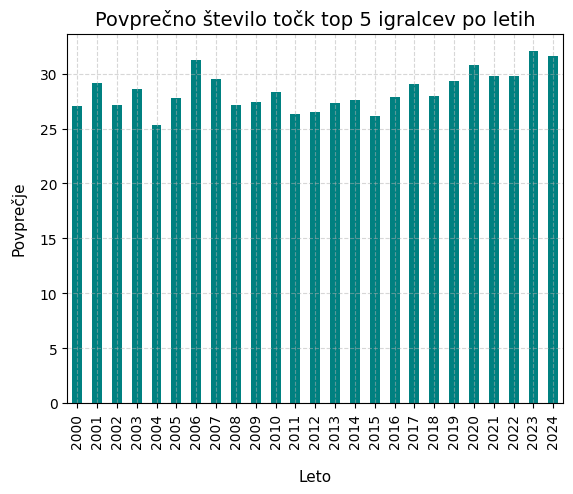

In [67]:
povprečje_top5.plot(x="Year", y="mean", kind="bar", color="teal")
plt.title("Povprečno število točk top 5 igralcev po letih", fontsize=14)
plt.xlabel("Leto", fontsize=11, labelpad=15)
plt.ylabel("Povprečje", fontsize=11, labelpad=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### 2.2. Povprečje vseh igralcev v vsakem letu

Zanimalo me je tudi povprečje vseh igralcev v vsakem letu in če se dinamika tega kaj povezuje in razlikuje od povprečja najboljših pet igralcev.

In [ ]:
povprečje = tabela_podatkov.groupby("Year")["PTS"].mean()
najboljše_leto = povprečje.idxmax()
najslabše_leto = povprečje.idxmin()

print(f"Najboljše leto: {najboljše_leto}")
print(f"Najslabše leto: {najslabše_leto}")

Najboljše leto: 2023
Najslabše leto: 2004


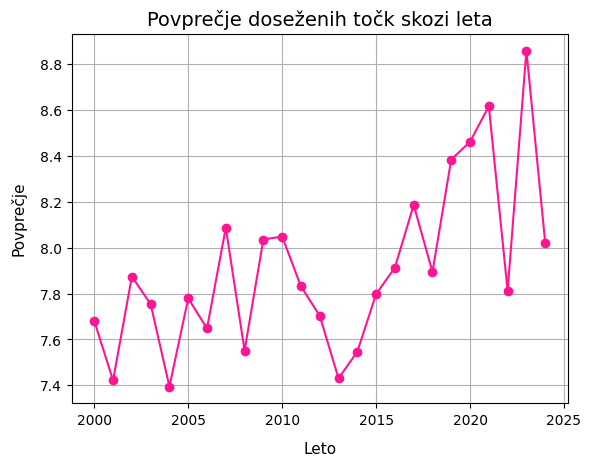

In [69]:
povprečje.plot(x="Year", y="mean", kind="line", legend=False, marker="o", color="deeppink")
plt.title("Povprečje doseženih točk skozi leta", fontsize=14)
plt.xlabel("Leto",fontsize=11, labelpad=10)
plt.ylabel("Povprečje",fontsize=11, labelpad=10)
plt.grid()
plt.show()

## Ugotovitve

Prvi graf predstavlja 5 najboljših strelcev vsake sezone. Povprečje se giblje med 26 in 33 točk ter se je v 25-ih letih nekoliko povečalo. Najnižje povprečje je bilo leta 2004, najvišje pa 2023.
V drugem grafu pa si lahko pogledamo povprečje doseženih točk vseh igralcev vsake sezone. Tu je povprečje bistveno nižje kot pri prvem grafu, saj se giblje med 7.4 in 8.9 točkami.
Tu lahko opazimo bistveno večje nihanje v zadnjih petih letih kot pri prvem grafu. Povprečje top 5 strelcev je leta 2021 in 2022 enako, medtem ko je povprečje vseh igralcev strmo padlo in leta 2023 strmo naraslo.
Ugotovila sem, da ti dve povprečji ne nihata vedno sorazmerno, torej ne vplivata druga na drugo v takšnem pomeni kot sem mislila.

## 3. Povprečna starost top 5 igralcev

Zanima me povprečna starost top 5 igralcev v vsakem letu in če se ta kaj zmanjšuje.

In [ ]:
top5_starost = (
    tabela_podatkov.groupby("Year", group_keys=False)
    .apply(lambda x: x.nlargest(5,"PTS"))
)

C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_11084\708958538.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5,"PTS"))


In [ ]:
povprečna_starost_top5 = (
    top5_starost
    .groupby("Year")["Age"]
    .mean()
)

najstarejši = povprečna_starost_top5.idxmax()
najmlajši = povprečna_starost_top5.idxmin()

print(f"Najnižja povprečna starost igralcev nastopi v letu {najmlajši}.")
print(f"Najvišja povprečna starost igralcev nastopi v letu {najstarejši}.")


Najnižja povprečna starost igralcev nastopi v letu 2001.
Najvišja povprečna starost igralcev nastopi v letu 2022.


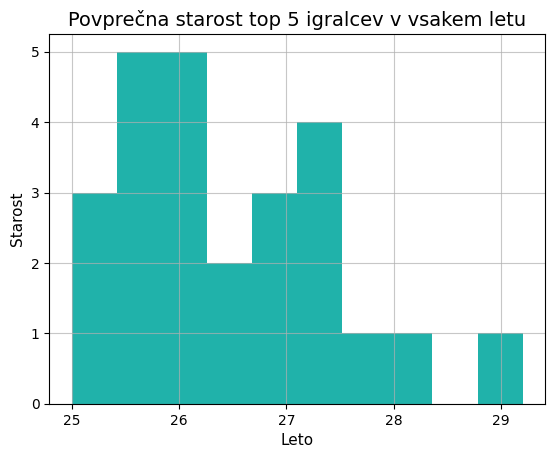

In [ ]:
povprečna_starost_top5.plot(x="Year", y="Age", kind="hist", color="lightseagreen")
plt.title("Povprečna starost top 5 igralcev v vsakem letu", fontsize=14)
plt.xlabel("Leto", fontsize=11)
plt.ylabel("Starost", fontsize=11)
plt.grid(True, alpha=0.7)
plt.show()

### Ugotovitve 



## 4. Učinkovitost igralcev

### 4. 1. Delež doseženih točk

Zanimalo me je kako je top 10 igralcev vsako leto učinkovito na minuto svoje igre. Torej koliko točk v povprečju dosežejo vsako minuto.

In [71]:
tabela_podatkov["točke_na_minuto"] = tabela_podatkov["PTS"] / tabela_podatkov["MP"]

top10_igralcev = (
    tabela_podatkov.groupby("Year", group_keys=False)
    .apply(lambda x: x.nlargest(10, "PTS"))
)

C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_11084\1183005204.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, "PTS"))


In [73]:
povprečna_učinkovitost = (
    top10_igralcev.groupby("Year")["točke_na_minuto"]
    .mean()
    .reset_index(name="Povprečna učinkovitost na minuto")
)

povprečna_učinkovitost

,Year,Povprečna učinkovitost na minuto
0,2000,0.651188
1,2001,0.683075
2,2002,0.653616
3,2003,0.656107
4,2004,0.613858
5,2005,0.665929
6,2006,0.716888
7,2007,0.699638
8,2008,0.668663
9,2009,0.685299


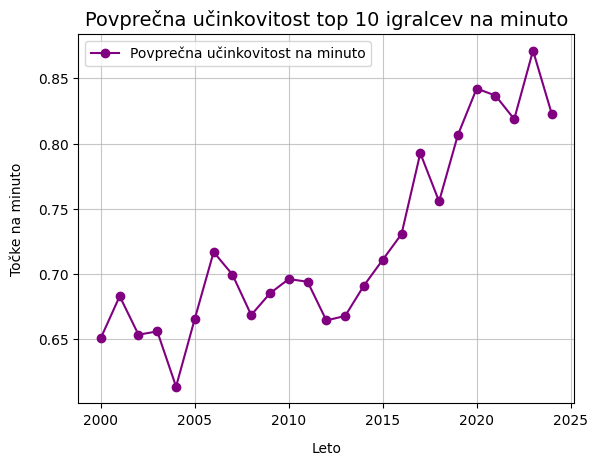

In [77]:
povprečna_učinkovitost.plot(x="Year", y="Povprečna učinkovitost na minuto", kind="line", marker="o", color="purple")
plt.title("Povprečna učinkovitost top 10 igralcev na minuto", fontsize=14)
plt.xlabel("Leto", labelpad=10)
plt.ylabel("Točke na minuto", labelpad=10)
plt.grid(True, alpha=0.7)
plt.show()


### 4. 2. Najbolj učinkovit igralec

Zanimalo me je tudi kateri igralec je najboljši učinkovit pri doseganju točk v vseh 24 letih. 
Pri izračunu sem si pomagala s prejšnjo kodo povprečna učinkovitost na minuto. 

In [ ]:
top10_najboljših = (
    tabela_podatkov.sort_values(by="točke_na_minuto", ascending=False)
    .drop_duplicates(subset="Player")   #vzamem samo najboljšo sezono vsakega igralca
    .head(10)["Player"]
)

top10_najboljših

10741       Naz Mitrou-Long
11525               Zhou Qi
8311        DeAndre Liggins
13648           Ahmad Caver
3043          Jackie Butler
4609           Gerald Green
9579        Jimmer Fredette
14942    Izaiah Brockington
12769         Udonis Haslem
5393        Marcus Williams
Name: Player, dtype: object

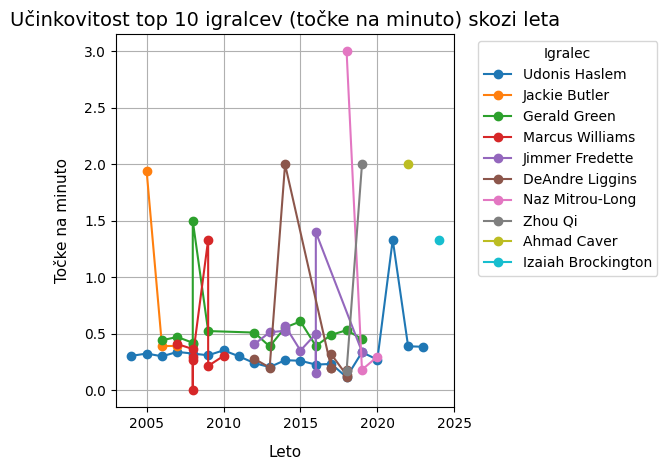

In [80]:
top10_tabela = tabela_podatkov[tabela_podatkov["Player"].isin(top10_najboljših)]  # filtriram podatke samo za teh 10 igralcev

for igralec in top10_tabela["Player"].unique():
    igralec_data = top10_tabela[top10_tabela["Player"] == igralec]
    plt.plot(
        igralec_data["Year"],
        igralec_data["točke_na_minuto"],
        marker="o",
        label=igralec
    )

plt.title("Učinkovitost top 10 igralcev (točke na minuto) skozi leta", fontsize=14)
plt.xlabel("Leto", fontsize=11, labelpad=10)
plt.ylabel("Točke na minuto", fontsize=11, labelpad=10)
plt.legend(title="Igralec", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Top 10 igralcev v vseh sezonah

### 5.1. Dosežene točke

C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_11084\2138369858.py:16: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_11084\2138369858.py:16: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


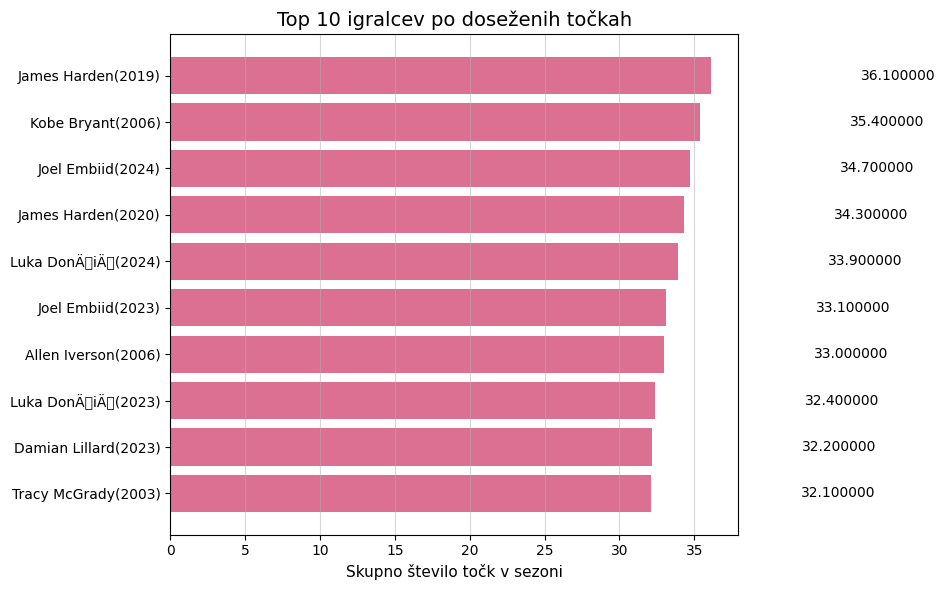

In [85]:
top10_pts = tabela_podatkov.sort_values(by="PTS", ascending=False).head(10)
top10_pts["Naziv"]  = top10_pts["Player"] + "(" + top10_pts["Year"].astype(int).astype(str) + ")"

plt.figure(figsize=(10,6))
bars=plt.barh(top10_pts["Naziv"], top10_pts["PTS"], color="palevioletred")
plt.title("Top 10 igralcev po doseženih točkah", fontsize=14)
plt.xlabel("Skupno število točk v sezoni", fontsize=11)
plt.gca().invert_yaxis()   #največje naj bo na vrhu
plt.grid(axis="x", alpha=0.5)

for bar in bars:
    debelina = bar.get_width()
    plt.text(debelina + 10, bar.get_y() + bar.get_height() / 2,
             f"{debelina:0f}", va="center")
    
plt.tight_layout()
plt.show()



### 5.2. Ekipe

Zanimalo me je tudi katera ekipa ima največ igralcev med top 10.

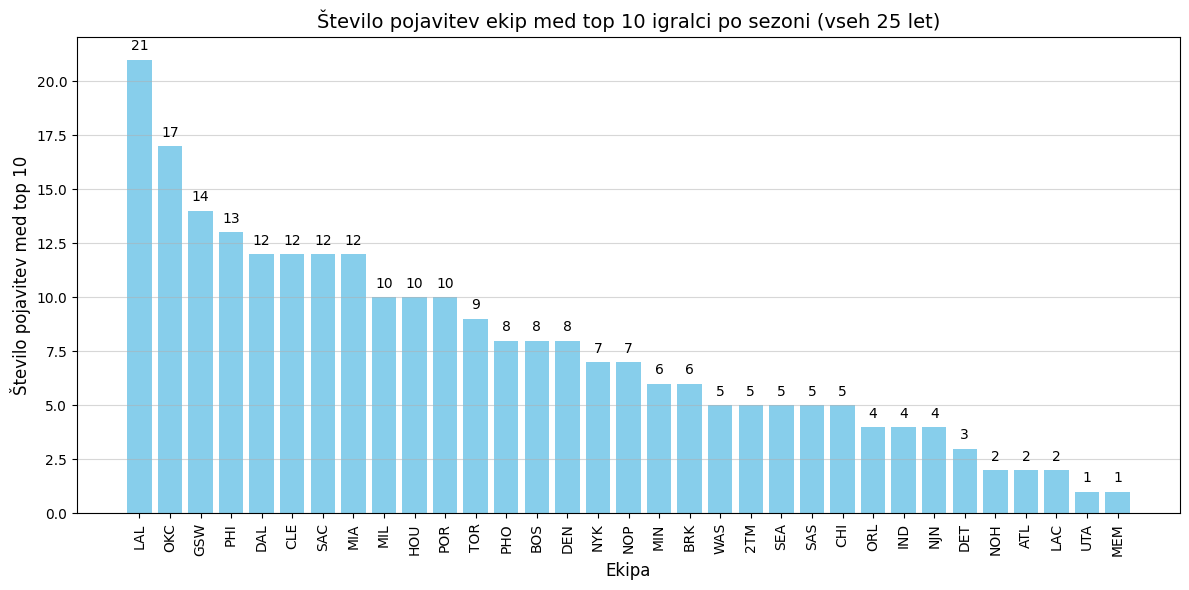

In [90]:
top10_po_letih = (
    tabela_podatkov.sort_values(by=["Year", "PTS"], ascending=[True, False])
    .groupby("Year")
    .head(10)
)

št_ekip = top10_po_letih["Team"].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(št_ekip.index, št_ekip.values, color="skyblue")
plt.title("Število pojavitev ekip med top 10 igralci po sezoni (vseh 25 let)", fontsize=14)
plt.xlabel("Ekipa", fontsize=12)
plt.ylabel("Število pojavitev med top 10", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", alpha=0.5)

for bar in bars:     #dodaj številke na vrh stolpcev
    yval= bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, int(yval), ha="center", va="bottom")

plt.tight_layout()
plt.show()

### 5.3. Pozicije

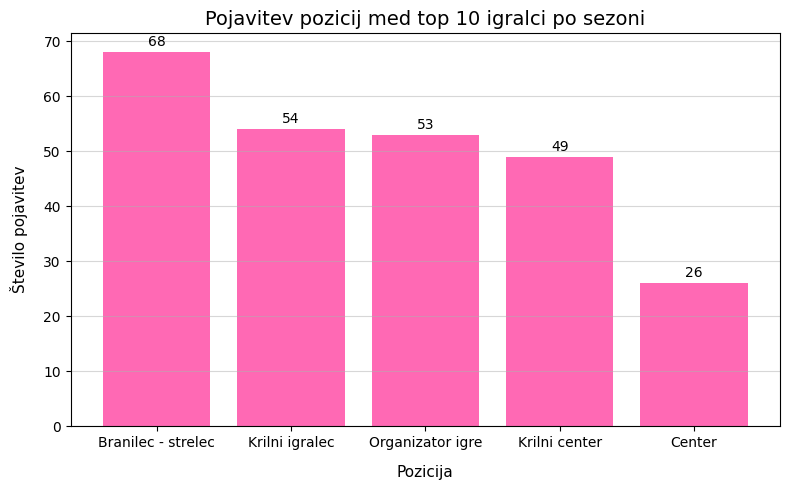

In [89]:
top10_pozicije = (
    tabela_podatkov.sort_values(by=["Year", "PTS"], ascending=[True, False])
    .groupby("Year")
    .head(10)
)

št_pozicij = top10_pozicije["Pos"].value_counts()


prevodi= {
    "PG" : "Organizator igre",
    "SG" : "Branilec - strelec",
    "SF" : "Krilni igralec",
    "PF" : "Krilni center",
    "C" : "Center",
}

št_pozicij.index = št_pozicij.index.map(lambda x: prevodi.get(x,x))

plt.figure(figsize=(8, 5))
bars = plt.bar(št_pozicij.index, št_pozicij.values, color="hotpink")
plt.title("Pojavitev pozicij med top 10 igralci po sezoni", fontsize=14)
plt.xlabel("Pozicija", fontsize=11, labelpad=11)
plt.ylabel("Število pojavitev", fontsize=11, labelpad=11)
plt.grid(axis="y", alpha=0.5)


for bar in bars:
    yval= bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha="center", va="bottom")

plt.tight_layout()
plt.show()

### Ugotovitve 

Pri tej analizi sem želela ugotoviti kateri so top 10 igralci z največjim številom točk v vseh sezonah in koliko točk so dosegli. Zanimalo me je tudi število pojavitev ekip in pozicij top 10 igralcev vsako sezono. Ugotovila sem, da med najboljšimi strelci prevladuje James Harden, sledi mu Kobe Bryant. Med top 10 igralcev vsako sezono pa močno prevladuje ekipa Dallas, pri pozicijah pa Branilec - strelec. Zato je zanimivo, da je večina igralcev z največjim številom točk v vseh sezonah v vlogi organizatorja igre in ne branilec_strelec.

## 6. Zaključek

Glavno v